#### **_Linear Regression_**

**Linear Regression with Mean Squared Error (MSE)**  

**1. Introduction to Linear Regression**  
Linear regression is a fundamental machine learning algorithm used to model the relationship between **input features** (independent variable) and an **output variable** (dependent variable). It assumes a **linear relationship** between variables and is commonly used for **predictive analysis**.  

**2. Goal of Linear Regression**  
The goal is to fit a straight line through the data points such that it minimizes the error. The equation of a straight line is:  
$y = m \cdot x + b$  
Where:  
- $y$: Predicted value (output)  
- $m$: Slope of the line  
- $x$: Input value (feature)  
- $b$: Intercept (bias term)  

**3. Graphical Representation of Linear Regression**  
The **X-axis** represents the input feature (e.g., study time), and the **Y-axis** represents the output variable (e.g., exam score). Data points represent the actual values, and the line $y = m \cdot x + b$ represents the predicted relationship.  

**4. Understanding Error**  
The error is the difference between the actual value $y_i$ and the predicted value $\hat{y}_i$:  
$Error = y_i - \hat{y}_i$  
Where:  
- $y_i$: Actual value of the $i^{th}$ data point  
- $\hat{y}_i$: Predicted value using $y = m \cdot x + b$  

**5. Mean Squared Error (MSE)**  
The Mean Squared Error quantifies the error between predicted and actual values:  
$E = \frac{1}{n} \sum_{i=0}^{n} \left( y_i - (m \cdot x_i + b) \right)^2$  
Where:  
- $y_i$: Actual value of the $i^{th}$ data point  
- $m \cdot x_i + b$: Predicted value for the $i^{th}$ data point  
- $n$: Total number of data points  

**6. Optimization Goal**  

The goal is to find the values of $m$ and $b$ that minimize $E$. This is done by computing the partial derivatives of $E$ with respect to $m$ and $b$.  

**7. Partial Derivative with Respect to $m$: $\frac{\partial E}{\partial m}$**  

Start with the MSE formula:  
$E = \frac{1}{n} \sum_{i=0}^{n} \left( y_i - (m \cdot x_i + b) \right)^2$  

The derivative of $E$ with respect to $m$ is:  
$\frac{\partial E}{\partial m} = \frac{-2}{n} \sum_{i=0}^{n} x_i \cdot (y_i - (m \cdot x_i + b))$  

**8. Partial Derivative with Respect to $b$: $\frac{\partial E}{\partial b}$**  

Start with the MSE formula:  
$E = \frac{1}{n} \sum_{i=0}^{n} \left( y_i - (m \cdot x_i + b) \right)^2$  

The derivative of $E$ with respect to $b$ is:  
$\frac{\partial E}{\partial b} = \frac{-2}{n} \sum_{i=0}^{n} (y_i - (m \cdot x_i + b))$  

**9. Gradient Descent Algorithm**  

To minimize $E$, the gradient descent algorithm iteratively updates $m$ and $b$ based on the gradients.  

**Update for $m$:**  
$m = m - L \cdot \frac{\partial E}{\partial m}$  

**Update for $b$:**  
$b = b - L \cdot \frac{\partial E}{\partial b}$  

Where:  
- $L$: Learning rate (e.g., $0.0001$)  
- $\frac{\partial E}{\partial m}$: Gradient of $E$ with respect to $m$  
- $\frac{\partial E}{\partial b}$: Gradient of $E$ with respect to $b$  

**10. Complete Process of Gradient Descent**  

1. Initialize $m$ and $b$ (e.g., $m = 0$, $b = 0$).  

2. Compute the gradients:  
$\frac{\partial E}{\partial m} = \frac{-2}{n} \sum_{i=0}^{n} x_i \cdot (y_i - (m \cdot x_i + b))$  
$\frac{\partial E}{\partial b} = \frac{-2}{n} \sum_{i=0}^{n} (y_i - (m \cdot x_i + b))$  

3. Update $m$ and $b$:  
$m = m - L \cdot \frac{\partial E}{\partial m}$  
$b = b - L \cdot \frac{\partial E}{\partial b}$  

4. Repeat steps 2–3 for a fixed number of iterations or until convergence.  

5. Output the final values of $m$ and $b$.  

**11. Learning Rate ($L$)**  

The learning rate $L$ controls how large a step is taken in the direction of the gradient. A small $L$ ensures gradual convergence, while a large $L$ may overshoot the minimum or fail to converge.  

**12. Graphical Intuition**  

The gradient ($\frac{\partial E}{\partial m}$ and $\frac{\partial E}{\partial b}$) points in the direction of **steepest ascent**. Gradient descent moves in the **opposite direction** to minimize $E$.  



Trained slope (m): 2.456812234652625
Trained intercept (b): 5.196946592018253


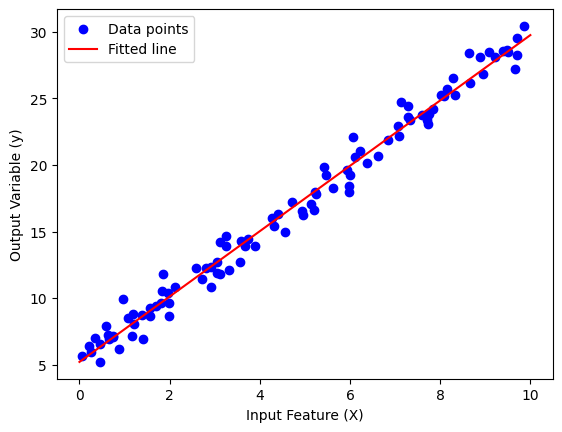

In [4]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
X = np.random.rand(100, 1) * 10  
# Input feature (100 points between 0 and 10)
true_slope = 2.5
true_intercept = 5
noise = np.random.randn(100, 1)  # Add some noise
y = true_slope * X + true_intercept + noise  # Output variable

# Gradient Descent Implementation
def compute_gradients(X, y, m, b):
    n = len(X)
    y_pred = m * X + b
    error = y - y_pred
    dm = (-2 / n) * np.sum(X * error)
    db = (-2 / n) * np.sum(error)
    return dm, db

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, b = 0, 0  # Initialize slope and intercept
    for _ in range(epochs):
        dm, db = compute_gradients(X, y, m, b)
        m -= learning_rate * dm
        b -= learning_rate * db
    return m, b

# Train the model
learning_rate = 0.01
epochs = 1000
final_m, final_b = gradient_descent(X, y, learning_rate, epochs)

# Display results
print(f"Trained slope (m): {final_m}")
print(f"Trained intercept (b): {final_b}")

# Predictions and visualization
X_test = np.linspace(0, 10, 100).reshape(-1, 1)  # Test data
y_pred = final_m * X_test + final_b

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', label='Fitted line')
plt.xlabel('Input Feature (X)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

In [5]:
# Example prediction
def predict(X, m, b):
    return m * X + b

new_data = np.array([[4], [6], [8]])  # Example input values
y_pred_new = predict(new_data, final_m, final_b)
print("Predictions for new data:", y_pred_new)

Predictions for new data: [[15.02419553]
 [19.93782   ]
 [24.85144447]]



**Linear Regression using the Ordinary Least Squares (OLS) Method**

**Step 1: Problem Definition**  
The goal is to find the best-fit line:  
$ y = mx + b $  
Where:  
- $ y $ is the dependent variable.  
- $ x $ is the independent variable.  
- $ m $ (slope) and $ b $ (intercept) are the parameters to be estimated.  

**Step 2: Hypothesis (Model)**  
For each data point $ (x_i, y_i) $, the predicted value is:  
$ \hat{y}_i = mx_i + b $  

**Step 3: Residual Sum of Squares (RSS)**  
The **Residual Sum of Squares (RSS)** measures the total squared difference between actual and predicted values:  
$ RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 $  
Substituting $ \hat{y}_i = mx_i + b $:  
$ RSS = \sum_{i=1}^n (y_i - (mx_i + b))^2 $  
The objective is to minimize $ RSS $ to find the optimal $ m $ and $ b $.  

**Step 4: Minimize the Loss (Optimization)**  
To minimize $ RSS $, calculate the partial derivatives with respect to $ m $ and $ b $, set them to zero, and solve.

**Partial Derivative w.r.t. $ m $:**  
$ \frac{\partial RSS}{\partial m} = -2 \sum_{i=1}^n x_i \cdot (y_i - (mx_i + b)) = 0 $  

**Partial Derivative w.r.t. $ b $:**  
$ \frac{\partial RSS}{\partial b} = -2 \sum_{i=1}^n (y_i - (mx_i + b)) = 0 $  

**Step 5: Solve for $ m $ and $ b $**  
The solutions to the above equations are:

**Slope ($ m $):**  
$ m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2} $  

**Intercept ($ b $):**  
$ b = \frac{\sum y_i - m \sum x_i}{n} $  

**Step 6: Best-Fit Line**  
Using the values of $ m $ and $ b $, the equation for the best-fit line is:  
$ \hat{y} = mx + b $  

**Step 7: Visualization**  
1. Plot the original data points $ (x_i, y_i) $.  
2. Plot the regression line $ \hat{y} = mx + b $.  
3. Optionally, visualize the residuals $ y_i - \hat{y}_i $.  

**Step 8: Interpreting RSS**  
A **lower RSS** indicates a better fit of the model to the data, while a **higher RSS** suggests a poor fit.

**Example: Applying the Formulas**  
For a dataset with the following values:  
- $ n = 5 $  
- $ \sum x_i = 15 $  
- $ \sum y_i = 25 $  
- $ \sum x_i^2 = 55 $  
- $ \sum y_i^2 = 135 $  
- $ \sum x_i y_i = 85 $  

**Compute $ m $:**  
$ m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2} $  

**Compute $ b $:**  
$ b = \frac{\sum y_i - m \sum x_i}{n} $  

Using these values, compute $ m $ and $ b $, and plot the resulting regression line.

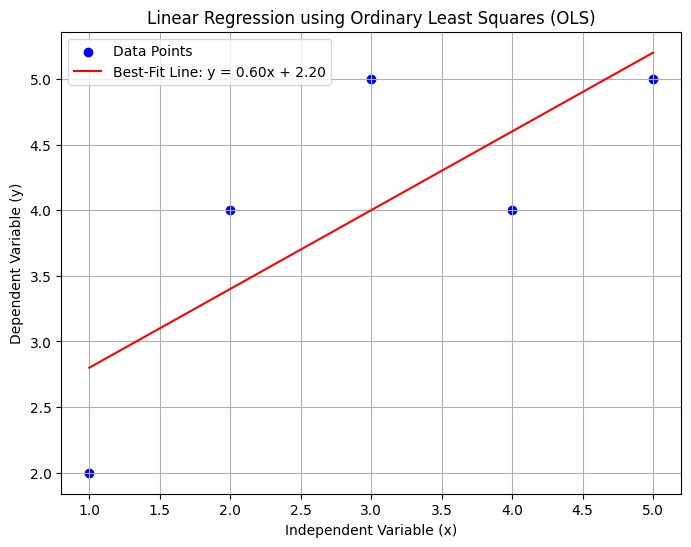

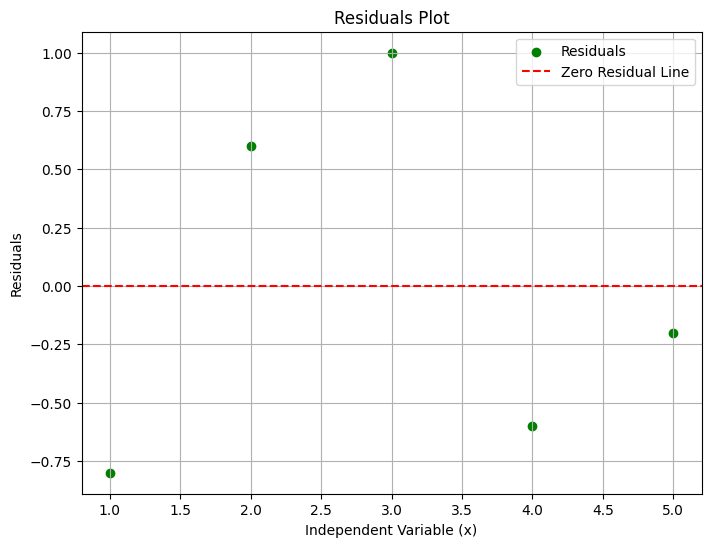

Linear Regression using Ordinary Least Squares (OLS):
Slope (m): 0.60
Intercept (b): 2.20
Residual Sum of Squares (RSS): 2.40


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# **Step 1: Problem Definition**
# Dataset (x: Independent Variable, y: Dependent Variable)
x = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([2, 4, 5, 4, 5])  # Dependent variable

# **Step 2: Summation Calculations**
n = len(x)  # Number of data points
sum_x = np.sum(x)  # Summation of x
sum_y = np.sum(y)  # Summation of y
sum_x2 = np.sum(x**2)  # Summation of x^2
sum_xy = np.sum(x * y)  # Summation of x * y

# **Step 3: Solve for Slope (m) and Intercept (b)**
# Using the derived formulas:
# m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - (sum_x)^2)
# b = (sum_y - m * sum_x) / n
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - m * sum_x) / n

# **Step 4: Predict the Best-Fit Line**
# The regression line equation is: y_pred = m * x + b
y_pred = m * x + b

# **Step 5: Residual Sum of Squares (RSS)**
# RSS = sum((y - y_pred)^2)
rss = np.sum((y - y_pred)**2)

# **Step 6: Visualization**
# Plotting the Data Points and Best-Fit Line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data Points')  # Original data points
plt.plot(x, y_pred, color='red', label=f'Best-Fit Line: y = {m:.2f}x + {b:.2f}')  # Regression line
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression using Ordinary Least Squares (OLS)')
plt.legend()
plt.grid(True)
plt.show()

# Residuals Plot (Optional)
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(x, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()

# **Step 7: Display Results**
print("Linear Regression using Ordinary Least Squares (OLS):")
print(f"Slope (m): {m:.2f}")
print(f"Intercept (b): {b:.2f}")
print(f"Residual Sum of Squares (RSS): {rss:.2f}")


In [24]:
# https://freedium.cfd/https://ksvmuralidhar.medium.com/basic-exploratory-data-analysis-template-for-regression-problems-20ca00c58f7d

In [6]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# LOADING DIABETES DATA (INPUT FEATURES) AND STORING IT IN A DATA FRAME
data = pd.DataFrame(load_diabetes()["data"],columns=load_diabetes()["feature_names"])
#ADDING TARGET VARIABLE TO THE DATA FRAME
data["target"] = load_diabetes()["target"]

In [ ]:
# from sklearn.datasets import load_diabetes
# import pandas as pd

# # Load the dataset
# diabetes = load_diabetes()

# # Create a DataFrame
# df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# # Add the target column
# df['target'] = diabetes.target

# # Display the first few rows
# print(df.head())



**1. `diabetes.data`**
- **Type**: `numpy.ndarray`  
- **Shape**: `(442, 10)`  
- **Description**: Contains feature data (independent variables).  


**2. `diabetes.feature_names`**
- **Type**: `list`  
- **Description**: Names of the 10 features (e.g., `['age', 'sex', 'bmi', 'bp', ...]`).


**3. `diabetes.target`**
- **Type**: `numpy.ndarray`  
- **Shape**: `(442,)`  
- **Description**: Target values (quantitative measure of disease progression).


**Why Access with the Dot Operator?**
The `diabetes` dataset is a **Bunch object**, a dictionary-like structure that supports both dictionary-style (`[]`) and attribute-style (`.`) access for cleaner, readable code.


```py
# Instead of this
data = diabetes['data']

# Do this
data = diabetes.data
```

In [14]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [17]:
print(data.info())
print("\n Description Of dataset \n")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

 Description Of dataset 

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.4

In [18]:
data.shape

(442, 11)

In [19]:
list(data.columns)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

In [20]:
data.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [21]:
data["sex"].unique()

array([ 0.05068012, -0.04464164])

The `data.loc` method in pandas accepts two arguments:

The two arguments in `data.loc[condition, "sex"] = value`:
- The first argument (`condition`) filters the rows based on a condition.
- The second argument (`"sex"`) specifies the column to modify.

In [22]:
data.loc[data["sex"]>0,"sex"] = 1
data.loc[data["sex"]<0,"sex"] = 0
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1.0,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0.0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,1.0,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,0.0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,0.0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,4.683258e-01,0.499561,0.000000,0.000000,0.000000,1.000000,1.000000
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [25]:
data["sex"] = data["sex"].astype(np.int8)
data.dtypes

age       float64
sex          int8
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [26]:
numeric_features = list(data.select_dtypes("float64").columns)
numeric_features.remove('target')
categorical_features = list(data.select_dtypes("int8").columns)
target = "target"
print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')


numeric_features:
['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

categorical_features:
['sex']

target:
target


In [27]:
np.round(data.isnull().mean() * 100,1)

age       0.0
sex       0.0
bmi       0.0
bp        0.0
s1        0.0
s2        0.0
s3        0.0
s4        0.0
s5        0.0
s6        0.0
target    0.0
dtype: float64

In [28]:
for i in categorical_features:
    print(f'{i}\n{np.round((data[i].value_counts() / data[i].value_counts().sum()) * 100,2)}')

sex
sex
0    53.17
1    46.83
Name: count, dtype: float64


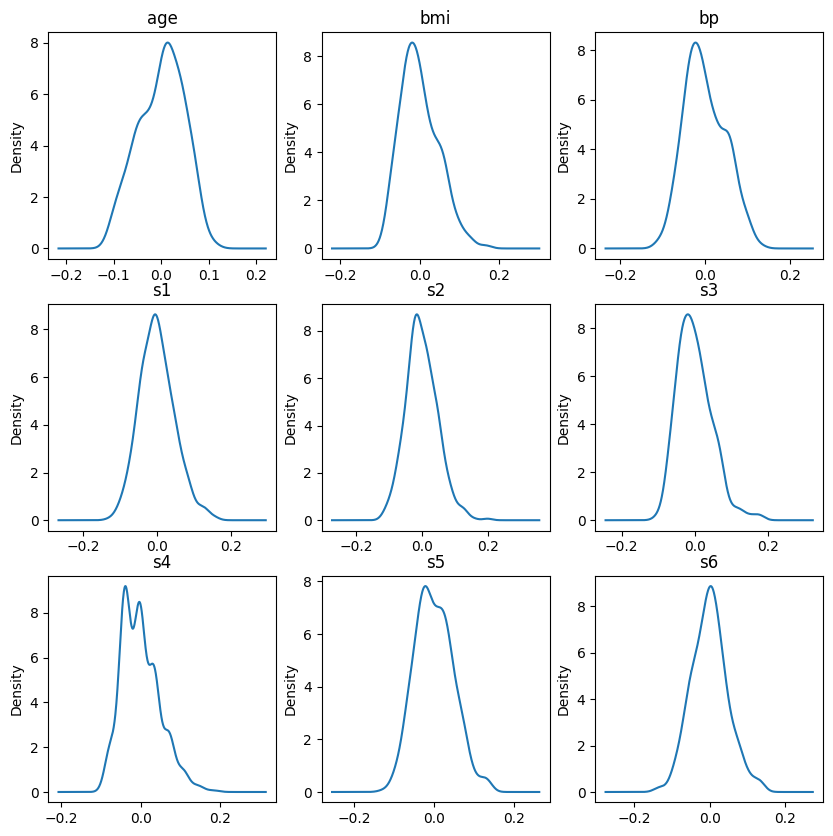

In [29]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    data[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

In [30]:
from scipy.stats import normaltest
for i in numeric_features:
    print(f'{i}: {"Not Gaussian" if normaltest(data[i].values,)[1]<0.05 else "Gaussian"}  {normaltest(data[i].values)}')


age: Not Gaussian  NormaltestResult(statistic=22.98072738269563, pvalue=1.0228182153991939e-05)
bmi: Not Gaussian  NormaltestResult(statistic=23.665619193944938, pvalue=7.262331793832974e-06)
bp: Not Gaussian  NormaltestResult(statistic=15.621391258402692, pvalue=0.00040537595836253937)
s1: Not Gaussian  NormaltestResult(statistic=11.20852755493566, pvalue=0.003682130413975528)
s2: Not Gaussian  NormaltestResult(statistic=18.031282903684225, pvalue=0.00012149451358987423)
s3: Not Gaussian  NormaltestResult(statistic=47.88065264242984, pvalue=4.007267957311832e-11)
s4: Not Gaussian  NormaltestResult(statistic=36.314360987185864, pvalue=1.3014776207788022e-08)
s5: Not Gaussian  NormaltestResult(statistic=6.462738215551416, pvalue=0.039503377366703625)
s6: Gaussian  NormaltestResult(statistic=4.295701660173062, pvalue=0.11673477122976575)


In [31]:
for i in numeric_features:
    print(f'{i}: {np.abs(np.round((data[i].std()/data[i].median()) * 100,2))}')

age: 884.61
bmi: 653.77
bp: 839.78
s1: 1102.07
s2: 1246.88
s3: 723.2
s4: 1836.97
s5: 2445.55
s6: 4418.59


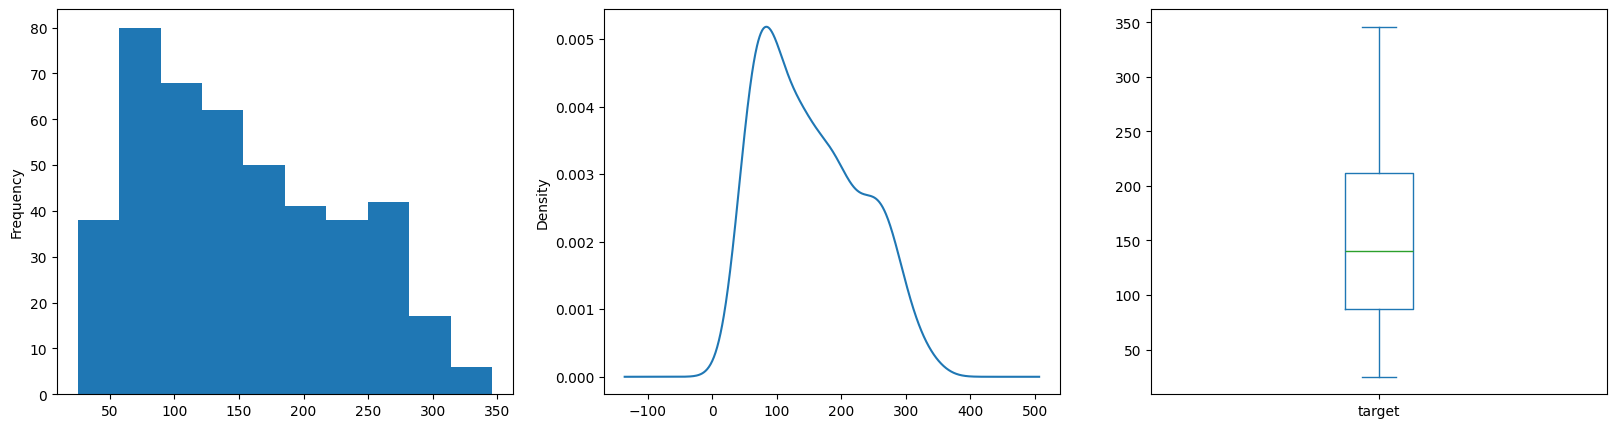

target: Not Gaussian  NormaltestResult(statistic=64.15092254678288, pvalue=1.1743678801847827e-14)


In [32]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
data[target].plot(kind="hist",ax=ax[0])
data[target].plot(kind="kde",ax=ax[1])
data[target].plot(kind="box",ax=ax[2])
plt.show()
print(f'{target}: {"Not Gaussian" if normaltest(data[target].values,)[1]<0.05 else "Gaussian"}  {normaltest(data[target].values)}')


<Axes: xlabel='sex', ylabel='target'>

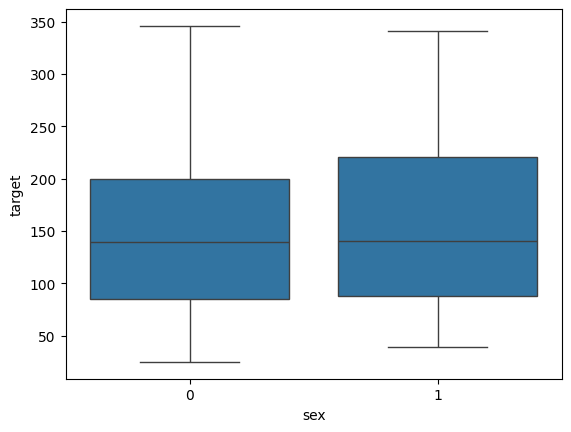

In [33]:
sns.boxplot(x=data[categorical_features[0]],y=data[target])

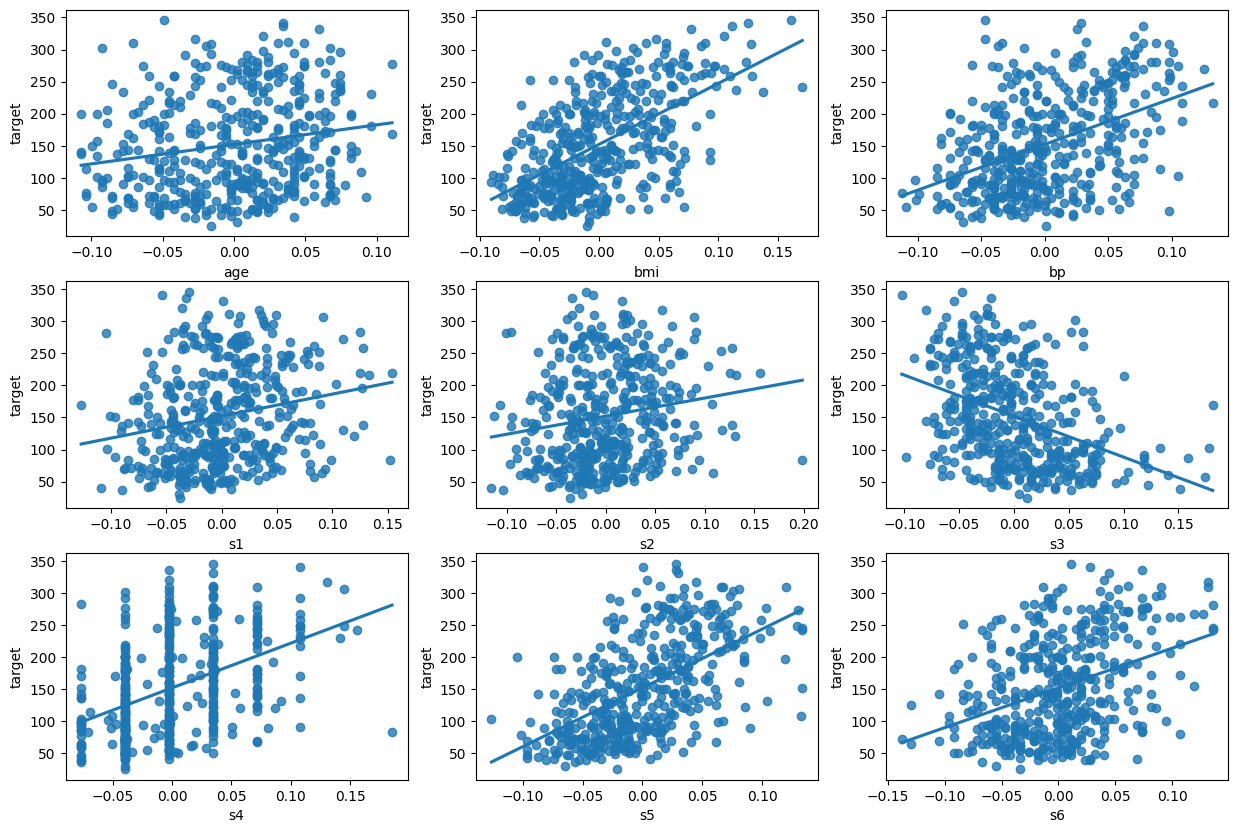

In [34]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.regplot(x=i,y="target",data=data,ax=ax[row,col],ci=False)
    col += 1

<Axes: >

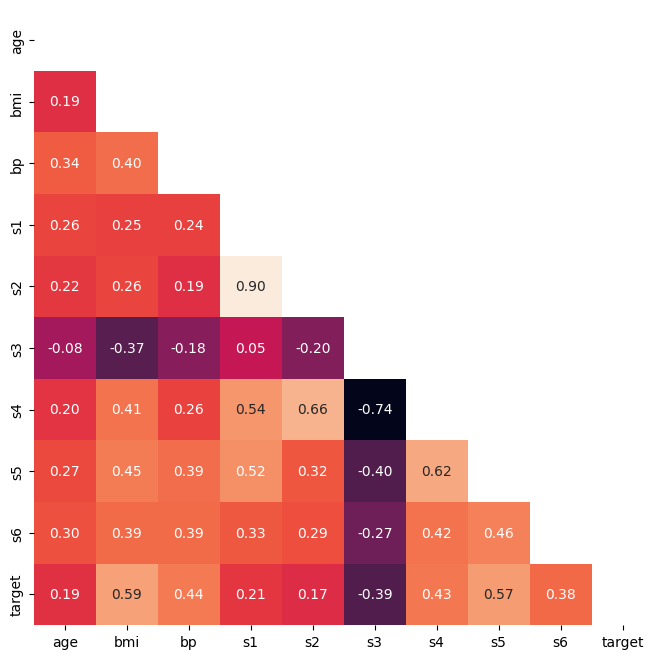

In [35]:
num_tgt = numeric_features.copy() 
num_tgt.append('target')
fig = plt.figure(figsize=(8,8))
sns.heatmap(data[num_tgt].corr(method='pearson'),annot=True,fmt='.2f',mask=np.triu(data[num_tgt].corr(method='pearson')),cbar=False)

<Axes: >

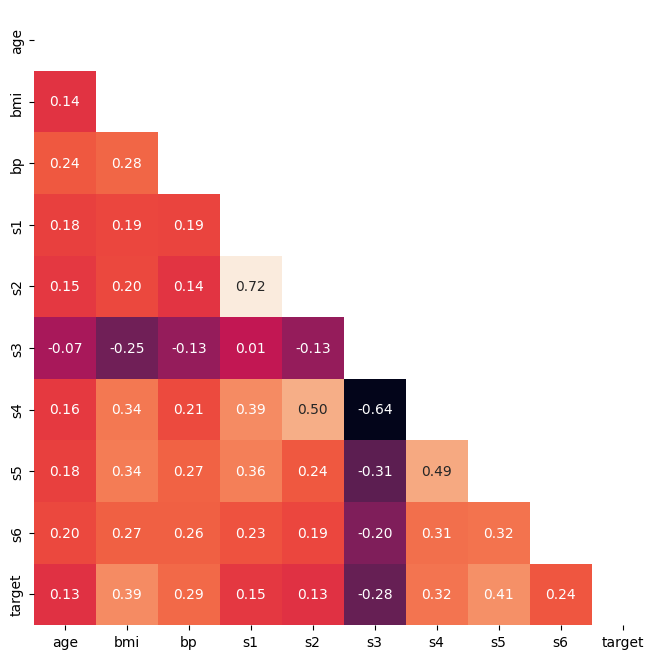

In [36]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(data[num_tgt].corr(method='kendall'),annot=True,fmt='.2f',mask=np.triu(data[num_tgt].corr(method='pearson')),cbar=False)
